In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import gmaps
import requests
import json
from config import gkey
from pprint import pprint

In [171]:
file_path = "database.csv"
df = pd.read_csv(file_path, low_memory=False)
dtype={'Perpetrator Age': int}
df.dropna()
df.head(1)

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI


In [52]:
#APi request to get states coordinates

#api_target_state = df.loc[:,"State"].unique()
#api_targeted_states = pd.DataFrame(target_state)

#api_states = list(api_targeted_states[0])

#api_state_lats = {}
#api_state_lngs = {}
#i=0

#for state in api_states:
    #print(state)

#    target_url = ('https://maps.googleapis.com/maps/api/geocode/json?'
                   'address={0}&key={1}').format(state, gkey)

#    geo_data = requests.get(target_url).json()
    
#    api_state_lats[state] = geo_data["results"][0]["geometry"]["location"]["lat"]
#    api_state_lngs[state] = geo_data["results"][0]["geometry"]["location"]["lng"]
#    i+=1


In [50]:
api_lats_df = pd.DataFrame.from_dict(api_state_lats, orient='index')
api_lats_df.reset_index(inplace=True)
api_lats_df.columns = ['State', 'State Lats']
api_lngs_df = pd.DataFrame.from_dict(api_state_lngs, orient='index')
api_lngs_df.reset_index(inplace=True)
api_lngs_df.columns = ['State', 'State Lngs']
api_coords = pd.merge(api_lats_df, api_lngs_df, how='left', on='State')
api_coords

,State,State Lats,State Lngs
0,Alaska,64.200841,-149.493673
1,Alabama,32.318231,-86.902298
2,Arkansas,35.201050,-91.831833
3,Arizona,34.048928,-111.093731
4,California,36.778261,-119.417932
5,Colorado,39.550051,-105.782067
6,Connecticut,41.603221,-73.087749
7,District of Columbia,38.907192,-77.036871
8,Delaware,38.910832,-75.527670
9,Florida,27.664827,-81.515754


In [3]:
target_state = df.loc[:,"State"].unique()
#pd.DataFrame(target_state).head(51)

In [4]:
state_lats = [64.2008413,32.3182314,35.20105,34.0489281,36.778261,39.5500507,41.6032207,38.9071923,38.9108325,27.6648274,32.1656221,19.8967662,41.8780025,44.0682019,40.6331249,40.2671941,39.011902,37.8393332,30.9842977,42.4072107,39.0457549,45.253783,44.3148443,46.729553,37.9642529,32.3546679,46.8796822,41.4925374,35.7595731,47.5514926,43.1938516,40.0583238,34.5199402,38.8026097,40.7127753,40.4172871,35.492221,43.8041334,41.2033216,41.5800945,33.836081,43.9695148,35.5174913,31.9685988,39.3209801,37.4315734,44.5588028,47.7510741,43.7844397,38.5976262,43.0759678]
state_lngs = [-149.4936733,-86.902298,-91.8318334,-111.0937311,-119.4179324,-105.7820674,-73.087749,-77.0368707,-75.52766989999999,-81.5157535,-82.9000751,-155.5827818,-93.097702,-114.7420408,-89.3985283,-86.1349019,-98.4842465,-84.2700179,-91.96233269999999,-71.3824374,-76.64127119999999,-69.4454689,-85.60236429999999,-94.6858998,-91.8318334,-89.3985283,-110.3625658,-99.9018131,-79.01929969999999,-101.0020119,-71.5723953,-74.4056612,-105.8700901,-116.419389,-74.0059728,-82.90712300000001,-97.50324619999999,-120.5542012,-77.1945247,-71.4774291,-81.1637245,-99.9018131,-86.5804473,-99.9018131,-111.0937311,-78.6568942,-72.57784149999999,-120.7401385,-88.7878678,-80.4549026,-107.2902839]

In [5]:
coord = pd.DataFrame({
    "State":target_state,
    "State Lat":state_lats,
    "State Lng":state_lngs
})
#coord

In [6]:
states = df.loc[:,"State"]
states_df = pd.DataFrame(states)
#states_df

In [7]:
states_coords_only = pd.merge(states_df, coord, how='left', on=['State'])
#states_coords_only

In [8]:
states_coords = pd.merge(df, coord, how='left', on=['State'])
#states_coords

In [318]:
state_count = df["State"].value_counts()
state_count = pd.DataFrame(state_count)
incident_percentage = state_count/638454*100
state_count["Percentage"] = incident_percentage


state_count.reset_index(inplace=True)
state_count.columns = ['State', 'Incidents Per State', 'Percentage']
#state_count

In [319]:
reduced_df = pd.merge(state_count, coord, how='left', on='State')
reduced_df

,State,Incidents Per State,Percentage,State Lat,State Lng
0,California,99783,15.628847,36.778261,-119.417932
1,Texas,62095,9.725838,31.968599,-99.901813
2,New York,49268,7.716766,40.712775,-74.005973
3,Florida,37164,5.820936,27.664827,-81.515754
4,Michigan,28448,4.455763,44.314844,-85.602364
5,Illinois,25871,4.052132,40.633125,-89.398528
6,Pennsylvania,24236,3.796045,41.203322,-77.194525
7,Georgia,21088,3.302979,32.165622,-82.900075
8,North Carolina,20390,3.193652,35.759573,-79.019300
9,Louisiana,19629,3.074458,30.984298,-91.962333


In [262]:
#Incidents by State HEATMAP
locations = reduced_df[["State Lat", "State Lng"]]
incident = reduced_df["Incidents Per State"]


fig = gmaps.figure(map_type="TERRAIN")

heat_layer = gmaps.heatmap_layer(locations, weights=incident,
                                 dissipating=False, max_intensity=25000,
                                 point_radius=2)


fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [13]:
weapons_per_state = df[["State", "Weapon"]]
weapons_per_state["Times Weapon was used"] = 1
weapon_count_state = weapons_per_state.groupby(["State", "Weapon"]).count()

weapon_count_state.reset_index(inplace=True)
weapon_count_state

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,State,Weapon,Times Weapon was used
0,Alabama,Blunt Object,776
1,Alabama,Drowning,13
2,Alabama,Drugs,1
3,Alabama,Explosives,3
4,Alabama,Fire,24
5,Alabama,Firearm,96
6,Alabama,Gun,3
7,Alabama,Handgun,6352
8,Alabama,Knife,1632
9,Alabama,Poison,4


In [14]:
weapon_count_coords = pd.merge(weapon_count_state, coord, how='left', on='State')
weapon_count_coords

,State,Weapon,Times Weapon was used,State Lat,State Lng
0,Alabama,Blunt Object,776,32.318231,-86.902298
1,Alabama,Drowning,13,32.318231,-86.902298
2,Alabama,Drugs,1,32.318231,-86.902298
3,Alabama,Explosives,3,32.318231,-86.902298
4,Alabama,Fire,24,32.318231,-86.902298
5,Alabama,Firearm,96,32.318231,-86.902298
6,Alabama,Gun,3,32.318231,-86.902298
7,Alabama,Handgun,6352,32.318231,-86.902298
8,Alabama,Knife,1632,32.318231,-86.902298
9,Alabama,Poison,4,32.318231,-86.902298


In [15]:
weapon_loc_df = weapon_count_coords.loc[weapon_count_coords["Weapon"] == "Handgun"]
weapon_loc_df

,State,Weapon,Times Weapon was used,State Lat,State Lng
7,Alabama,Handgun,6352,32.318231,-86.902298
23,Alaska,Handgun,548,64.200841,-149.493673
39,Arizona,Handgun,7054,34.048928,-111.093731
54,Arkansas,Handgun,3180,35.201050,-91.831833
69,California,Handgun,55429,36.778261,-119.417932
85,Colorado,Handgun,2705,39.550051,-105.782067
101,Connecticut,Handgun,2332,41.603221,-73.087749
116,Delaware,Handgun,444,38.910832,-75.527670
130,District of Columbia,Handgun,3853,38.907192,-77.036871
146,Florida,Handgun,14213,27.664827,-81.515754


In [37]:
# Type of weapon used per state HEATMAP

locations = weapon_loc_df[["State Lat", "State Lng"]]
weight = weapon_loc_df["Times Weapon was used"]


fig = gmaps.figure(map_type="TERRAIN")

heat_layer = gmaps.heatmap_layer(locations, weights=weight,
                                 dissipating=False, max_intensity=10000,
                                 point_radius=2)


fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [17]:
df = pd.merge(df, coord, how='left', on='State')
df.head(1)

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source,State Lat,State Lng
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI,64.200841,-149.493673


In [316]:
incidents_per_year = df[["Year","State"]]
incidents_per_year["Num of Incidents"] = 1
incidents_count_year = incidents_per_year.groupby(["Year", "State"]).count()

incidents_count_year.reset_index(inplace=True)

#You can change the state's name in order to print the data of the state you want.

state_loc_df = incidents_count_year.loc[incidents_count_year["State"] == "Texas"]
state_loc_df

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Year,State,Num of Incidents
43,1980,Texas,2402
94,1981,Texas,2293
145,1982,Texas,1848
196,1983,Texas,2352
247,1984,Texas,2208
298,1985,Texas,2248
349,1986,Texas,2347
399,1987,Texas,2039
448,1988,Texas,2009
498,1989,Texas,2142


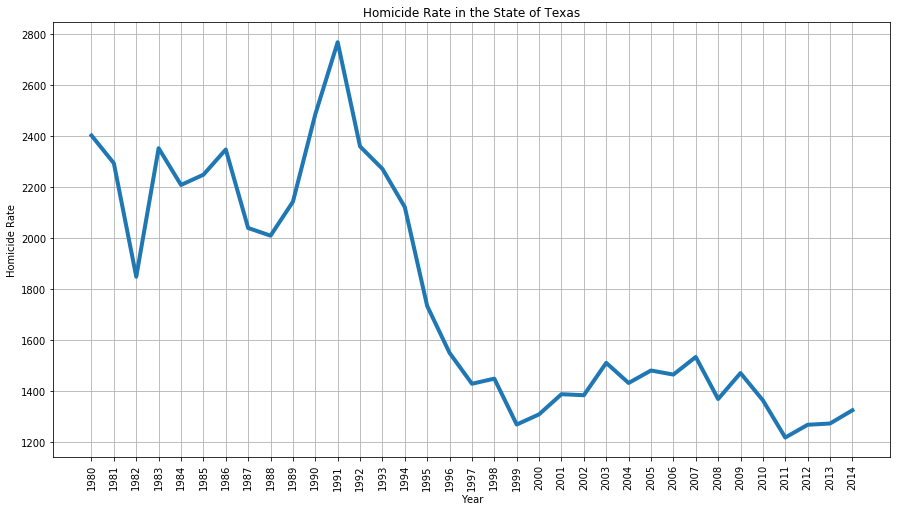

In [317]:
# This time line works with the data frame from above. So you can change it if needed.

year = state_loc_df.iloc[:,0]
violent_crime_rate = state_loc_df.iloc[:,2]
plt.plot(year, violent_crime_rate, linewidth=4)
plt.xticks(year, rotation=90)
plt.title('Homicide Rate in the State of Texas')
plt.xlabel('Year')
plt.ylabel('Homicide Rate')
plt.rcParams['figure.figsize'] = (15,8)
plt.grid()
plt.savefig(fname="Homicide Timeline Texas")
plt.show()

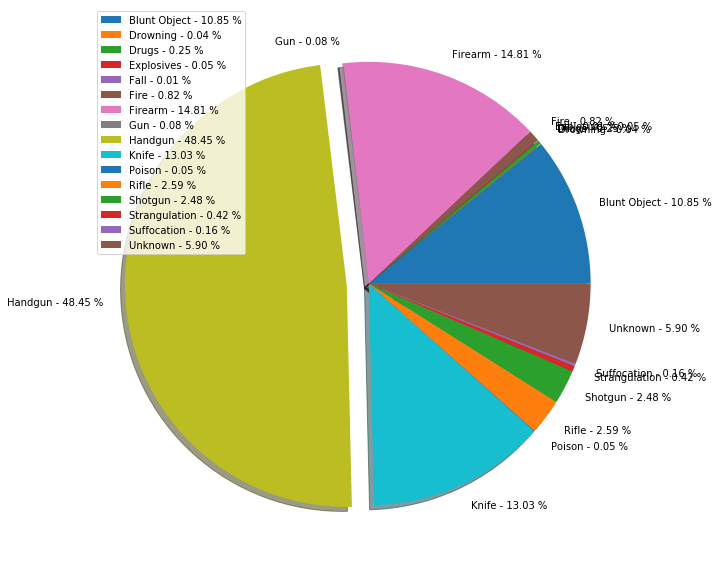

In [211]:
weapon_sum = df.groupby("Weapon").sum().reset_index()
sizes = weapon_sum["Incident"]
names = weapon_sum["Weapon"]
porcent = 100.*sizes/sizes.sum()
#labels = weapon_sum["Weapon"]
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(names, porcent)]
explode = (0,0,0,0,0,0,0,0,0.1,0,0,0,0,0,0,0)

plt.pie(sizes, labels=labels, explode=explode, shadow=True)
plt.legend(labels, loc="upper left")
plt.tight_layout()
plt.savefig("weapon of choice.png")

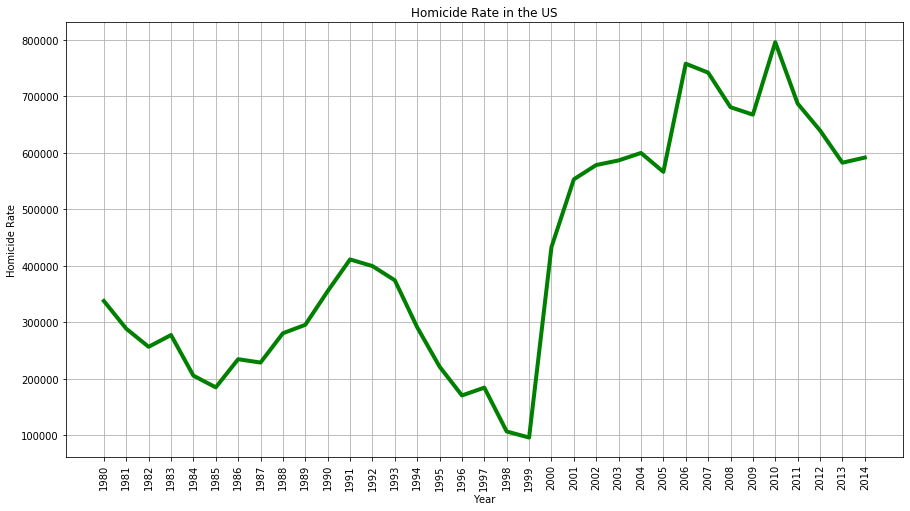

In [325]:
country_homicide_rate = df.groupby("Year").sum().reset_index()

year_c = country_homicide_rate.iloc[:,0]
violent_crime_rate_c = country_homicide_rate.iloc[:,2]
plt.plot(year_c, violent_crime_rate_c, color="green", linewidth=4)
plt.xticks(year, rotation=90)
plt.title('Homicide Rate in the US')
plt.xlabel('Year')
plt.ylabel('Homicide Rate')
plt.rcParams['figure.figsize'] = (15,8)
plt.grid()
plt.savefig(fname="Homicide Timeline in the US")
plt.show()

In [304]:
homicide_month.sort_values(by='Incident', ascending=False)

,Month,Record ID,Year,Incident,Victim Age,Victim Count,Perpetrator Count
5,July,18886928683,117154042,1425045,2055599,6996,11150
1,August,18426053531,115894026,1370946,2019559,6343,11079
11,September,17256438868,108005464,1281964,1876513,6607,9953
10,October,17164451941,107076559,1280656,1889222,6069,10145
8,May,17206187423,106573067,1263327,1849763,6428,9472
6,June,17381244827,107112341,1255666,1868152,5839,9914
4,January,16748972422,105625854,1205173,1838744,6615,10655
2,December,17694591708,110145332,1173745,1972425,7022,9041
0,April,16479388447,102210494,1158575,1805600,8184,9835
7,March,16276814583,102664351,1148590,1807406,6967,9637


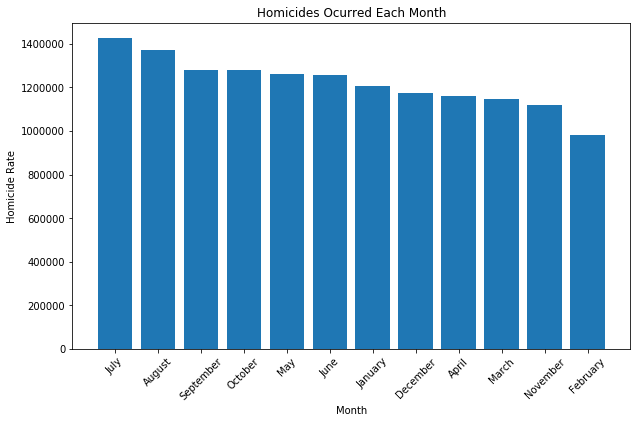

In [309]:
homicide_month = df.groupby("Month").sum().reset_index()
homicide_month.sort_values(by='Incident', ascending=False, inplace=True)

month = homicide_month.iloc[:,0]
violent_crime_rate_m = homicide_month.iloc[:,3]
#tick_locations = [value for value in month]

plt.bar(x=month, height=violent_crime_rate_m)
#plt.xticks(tick_locations, ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=45)
plt.xticks(month, rotation=45)
plt.title('Homicides Ocurred Each Month')
plt.xlabel('Month')
plt.ylabel('Homicide Rate')
plt.rcParams['figure.figsize'] = (10,6)
plt.savefig(fname="Homicide Quantity each month")